PYBER

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# Merge two dataframes using an inner join
merged_city_ride = pd.merge(city_data_df, ride_data_df, on="city", how="inner")

# Display the data table for preview
merged_city_ride.columns.values
merged_city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
#Groupby city, driver_count
Grpmerged_city_ride = merged_city_ride.groupby(['city', 'driver_count','type'])

In [4]:
#Grab data for my plot values

df_myChart = Grpmerged_city_ride['fare'].mean()  #We want average fares for each
df_myChart = pd.DataFrame(df_myChart)  #Make this into a DataFrame
df_myChart['ride_count'] = pd.DataFrame(Grpmerged_city_ride['ride_id'].count())  #Take count of ride ID for total rides

df_myChart = df_myChart.reset_index()  #We'll want to reset the index
df_myChart.head()



,city,driver_count,type,fare,ride_count
0,Amandaburgh,12,Urban,24.641667,18
1,Barajasview,26,Urban,25.332273,22
2,Barronchester,11,Suburban,36.422500,16
3,Bethanyland,22,Suburban,32.956111,18
4,Bradshawfurt,7,Rural,40.064000,10


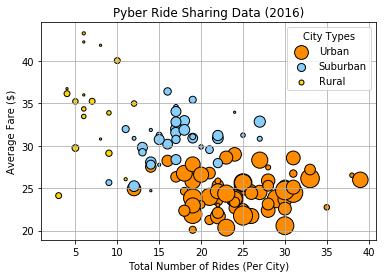

In [5]:
#Gather Data and build Bubble Chart

df_urban = df_myChart.loc[df_myChart['type'] == 'Urban']  #filtering for just urban
df_suburban = df_myChart.loc[df_myChart['type'] == 'Suburban']  #filtering for just suburban
df_rural = df_myChart.loc[df_myChart['type'] == 'Rural']  #filtering for just rural

fig, ax = plt.subplots(sharex=True)

df_urban.plot(kind='scatter', subplots=True, x='ride_count',y='fare',s=df_urban.driver_count*5, 
              c='darkorange', ax=ax, label='Urban', alpha=1.0, edgecolors='black',linewidth=1)

df_suburban.plot(kind='scatter', subplots=True, x='ride_count',y='fare',s=df_suburban.driver_count*5,
                 c='lightskyblue', ax=ax,label = 'Suburban',alpha = 1.0, edgecolors='black',linewidth=1)

df_rural.plot(kind='scatter', subplots=True, x='ride_count',y='fare',s=df_rural.driver_count*5,
              c='Gold', ax=ax, label = 'Rural',alpha=1.0, edgecolors='black',linewidth=1)

plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend(loc='best',title='City Types')
plt.savefig('PyberBubbleChart.png')
plt.show()

In [6]:
#Set up data for Pie Chart
df_pieChart = merged_city_ride[['type', 'fare','driver_count','ride_id']]

#Pie Group by type
df_grouped_pie = df_pieChart.groupby('type')

#Dataframe for count of total rides
df_rides_pie = pd.DataFrame(df_grouped_pie['ride_id'].count())
df_rides_pie = df_rides_pie.reset_index()
df_rides_pie = df_rides_pie.rename(columns={'ride_id':'Total Rides Taken'})

#Dataframe for total drivers
df_drivers_pie = pd.DataFrame(df_grouped_pie['driver_count'].sum())
df_drivers_pie = df_drivers_pie.reset_index()
df_drivers_pie = df_drivers_pie.rename(columns={'driver_count':'Total Drivers'})

#Dataframe for total fares
df_fares_pie = pd.DataFrame(df_grouped_pie['fare'].sum())
df_fares_pie = df_fares_pie.reset_index()
df_fares_pie = df_fares_pie.rename(columns={'fare':'Total Fares'})

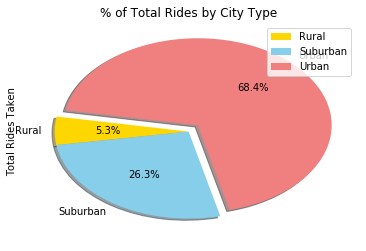

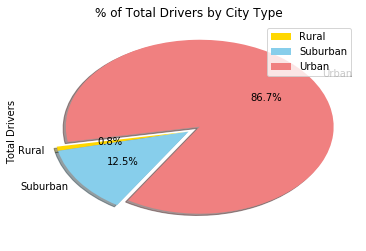

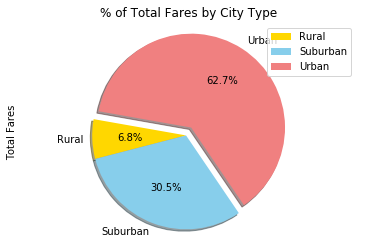

In [7]:
#create Pie Charts - Plots
df_rides_pie.plot(kind='pie',y='Total Rides Taken',labels=df_rides_pie['type'],explode = (0,0,.1),
                 autopct='%1.1f%%', shadow=True, startangle=-190, colors = ['gold','skyblue','lightcoral'], 
                title = '% of Total Rides by City Type')

df_drivers_pie.plot(kind='pie',y='Total Drivers',labels=df_rides_pie['type'],explode = (0,0,.1),
                 autopct='%1.1f%%', shadow=True, startangle=190, colors = ['gold','skyblue','lightcoral'],
                  title = '% of Total Drivers by City Type')

df_fares_pie.plot(kind='pie',y='Total Fares',labels=df_rides_pie['type'],explode = (0,0,.1),
                 autopct='%1.1f%%', shadow=True, startangle=-190, colors = ['gold','skyblue','lightcoral'],
                  title = '% of Total Fares by City Type')

plt.axis('equal')
plt.show()

Based on the Data, the percent breakout for all three city types point to Urban as the highest volume in all categories (which we all expected), suburban coming in second, and lastly rural. 
 

